In [732]:
%autoreload 2

In [894]:
import ajc
import numpy as np
import matplotlib.pyplot as plt

In [895]:
def simpleq(n):
    Q = np.zeros((n,n))
    np.fill_diagonal(Q[1:,:], 1)
    np.fill_diagonal(Q[:,1:], 1)
    np.fill_diagonal(Q, -2)
    return Q

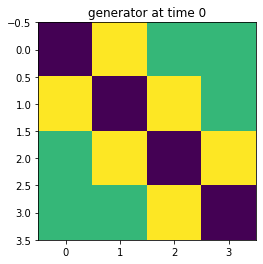

In [1221]:
nx = 4
nt = 50
dt = 0.3

dts = np.array([dt for i in range(nt)])
dts[-1] = 100
Qs = np.dstack([simpleq(nx) for i in range(nt)])

plt.title("generator at time 0")
plt.imshow(Qs[:,:,0])

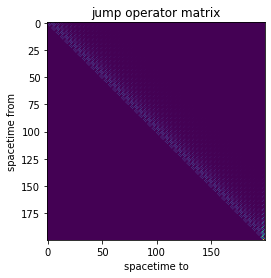

In [1222]:
j1 = ajc.AJCGalerkin(Qs, dts)
plt.title("jump operator matrix")
plt.xlabel("spacetime to")
plt.ylabel("spacetime from")
plt.imshow(j1.km)

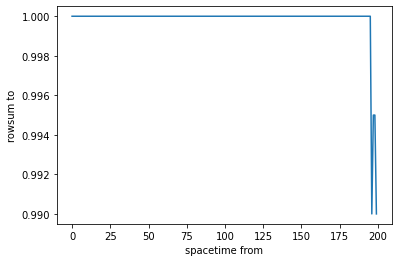

In [1223]:
plt.xlabel("spacetime from")
plt.ylabel("rowsum to")
plt.plot(np.sum(j1.km, axis=1)); 

In [1224]:
p=np.zeros((nx, nt))
p[0,0]=1

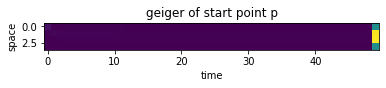

In [1227]:
g = j1.geiger(p)
plt.xlabel("time")
plt.ylabel("space")
plt.title("geiger of start point p")
plt.imshow(g)

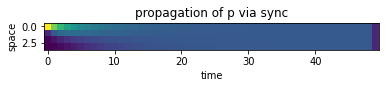

In [1228]:
s = j1.synchronize(g)
plt.xlabel("time")
plt.ylabel("space")
plt.title("propagation of p via sync")
plt.imshow(s)

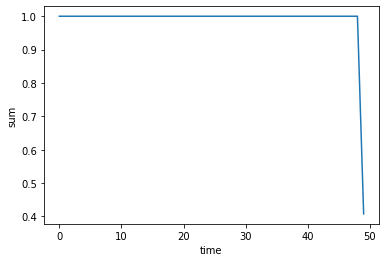

In [1229]:
plt.ylabel("sum"); plt.xlabel("time")
plt.plot(s.sum(axis=0))

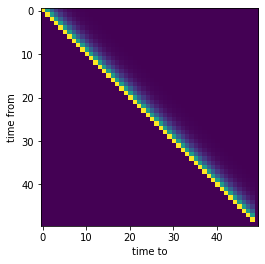

In [1230]:
S = j1.holding_probs()
plt.ylabel("time from")
plt.xlabel("time to")
plt.imshow(S[1,:,:])

array([[0.62510446, 0.62512447, 0.62514832, 0.62517674, 0.62521061,
        0.62525096, 0.62529905, 0.62535635, 0.62542463, 0.625506  ,
        0.62560295, 0.62571848, 0.62585615, 0.62602019, 0.62621567,
        0.62644861, 0.62672617, 0.62705692, 0.62745105, 0.62792069,
        0.62848032, 0.62914718, 0.62994181, 0.6308887 , 0.63201701,
        0.6333615 , 0.63496359, 0.6368726 , 0.63914731, 0.64185772,
        0.64508719, 0.64893494, 0.653519  , 0.65897967, 0.66548348,
        0.67322766, 0.68244503, 0.693409  , 0.70643799, 0.72189787,
        0.74019967, 0.76178721, 0.78710416, 0.81652044, 0.85017779,
        0.88767319, 0.92740822, 0.96522348, 0.9914297 , 0.        ],
       [0.62504331, 0.62505161, 0.62506149, 0.62507328, 0.62508732,
        0.62510405, 0.62512398, 0.62514774, 0.62517605, 0.62520978,
        0.62524998, 0.62529787, 0.62535495, 0.62542296, 0.625504  ,
        0.62560058, 0.62571565, 0.62585278, 0.62601618, 0.62621089,
        0.6264429 , 0.62671938, 0.62704883, 0.6

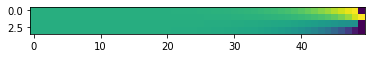

In [1231]:
nxt = j1.k.shape[0] * j1.k.shape[1]
inds_bnd = np.zeros(nxt, dtype=bool)
inds_bnd[-nx:] = True

g = np.zeros(nx)
g[1] = 1

c = j1.unflatten(j1.commitor(g, inds_bnd))
plt.imshow(c)
c

In [1232]:
self=j1
km = self.km
inds_inner = ~inds_bnd

km_ii = km[np.ix_(inds_inner, inds_inner)]  # inner
km_ib = km[np.ix_(inds_inner, inds_bnd)]  # boundary

ni = np.size(km_ii, 0)
inv = np.linalg.inv(np.identity(ni) - km_ii)

S = self.holding_probs()
Sg = np.einsum('is, i -> is', S[:, :, -2], g).T.flatten()

q_i = inv.dot(km_ib.dot(g) + Sg[inds_inner])

q = np.zeros(self.km.shape[0])
q[inds_inner] = q_i
q[inds_bnd] = g

In [1233]:
Sg

array([0.00000000e+00, 2.33479902e-13, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.25548485e-13, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.75490783e-13, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.41320289e-12, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.57516231e-12, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.69235761e-12, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.55016058e-12, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.55796487e-11, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.83880697e-11, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.17266230e-11, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.42521616e-11, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.71738845e-10, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.12928794e-10, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.70193670e-10, 0.00000000e+00, 0.00000000e+00,
      

In [1237]:
km.dot(q) + Sg - q

array([-2.22044605e-16, -1.11022302e-16,  2.22044605e-16,  2.22044605e-16,
        0.00000000e+00, -2.22044605e-16,  1.11022302e-16,  1.11022302e-16,
        1.11022302e-16,  2.22044605e-16,  3.33066907e-16,  4.44089210e-16,
       -2.22044605e-16,  1.11022302e-16, -1.11022302e-16,  0.00000000e+00,
        2.22044605e-16, -3.33066907e-16, -1.11022302e-16,  2.22044605e-16,
       -2.22044605e-16, -6.66133815e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -3.33066907e-16,  4.44089210e-16,  1.11022302e-16,
        1.11022302e-16,  1.11022302e-16, -2.22044605e-16, -1.11022302e-16,
        1.11022302e-16,  1.11022302e-16, -2.22044605e-16,  1.11022302e-16,
        1.11022302e-16, -1.11022302e-16, -6.66133815e-16,  2.22044605e-16,
       -1.11022302e-16,  1.11022302e-16,  1.11022302e-16,  0.00000000e+00,
        0.00000000e+00, -5.55111512e-16,  2.22044605e-16,  3.33066907e-16,
       -2.22044605e-16, -2.22044605e-16, -1.11022302e-16,  2.22044605e-16,
       -2.22044605e-16, -

In [1236]:
plt.imshow(S)

TypeError: Invalid shape (4, 50, 50) for image data

In [1240]:
n_state = 0
nx, nt = self.k.shape[0:2]
km = self.km
M = km - np.identity(nx*nt)
b = np.zeros(nx*nt)
for i in range(nt):
    st = i*nx + n_state  # spacetime index for state n_state at time i
    M[st, :] = 0
    M[st, st] = 1
    b[st] = 1

p = np.linalg.inv(M).dot(b)


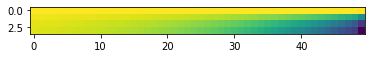

In [1243]:
plt.imshow(j1.unflatten(p))